In [1]:
import sqlite3

In [9]:
%pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [10]:
from tabulate import tabulate

In [2]:
%load_ext sql

In [3]:
# Connect to SQLite database
conn = sqlite3.connect(r'vivino.db')
# Create a cursor object
cur = conn.cursor()

In [13]:
sql_query = '''
SELECT 
    w.name AS WineName,
    k.name AS Keyword,
    SUM(kw.count) AS KeywordCount
FROM 
    wines w
JOIN 
    keywords_wine kw ON w.id = kw.wine_id
JOIN 
    keywords k ON kw.keyword_id = k.id
WHERE 
    k.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus')
GROUP BY 
    w.name, k.name
HAVING 
    SUM(kw.count) >= 10
    '''
cur.execute(sql_query)
results = cur.fetchall()
for row in results:
    print(row)

("'Giulio Ferrari' Riserva del Fondatore", 'citrus', 66)
("'Giulio Ferrari' Riserva del Fondatore", 'cream', 72)
("'Giulio Ferrari' Riserva del Fondatore", 'green apple', 15)
("'Giulio Ferrari' Riserva del Fondatore", 'toast', 96)
('25 anni Montefalco Sagrantino', 'coffee', 46)
('25 anni Montefalco Sagrantino', 'toast', 12)
('30 Year Old Tawny Port', 'coffee', 10)
('5 Puttonyos Aszú (Blue Label)', 'citrus', 118)
('5 Puttonyos Aszú (Blue Label)', 'cream', 68)
('5 Puttonyos Aszú (Blue Label)', 'green apple', 12)
('5 Puttonyos Aszú (Blue Label)', 'toast', 60)
('5 Stelle Sfursat', 'coffee', 70)
('50 & 50', 'coffee', 26)
('50 & 50', 'toast', 14)
('50 Old Vines Vecchie Vigne Negroamaro', 'coffee', 12)
('6 Anime Puglia Rosso', 'coffee', 20)
('6 Anime Puglia Rosso', 'toast', 10)
('60 Sessantanni Old Vines Primitivo di Manduria', 'coffee', 272)
('60 Sessantanni Old Vines Primitivo di Manduria', 'cream', 27)
('60 Sessantanni Old Vines Primitivo di Manduria', 'toast', 22)
('80 Vecchie Vigne Primi

In [15]:
from collections import defaultdict
sql_query = '''
SELECT 
    w.name AS WineName,
    k.name AS Keyword,
    SUM(kw.count) AS KeywordCount
FROM 
    wines w
JOIN 
    keywords_wine kw ON w.id = kw.wine_id
JOIN 
    keywords k ON kw.keyword_id = k.id
WHERE 
    k.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus')
GROUP BY 
    w.name, k.name
HAVING 
    SUM(kw.count) >= 10

    '''
cur.execute(sql_query)
results = cur.fetchall()


# Process the results into a dictionary where the keys are wine names
# and the values are dictionaries of keywords and their counts.
wines = defaultdict(lambda: defaultdict(int))
for wine_name, keyword, count in results:
    wines[wine_name][keyword] = count

#  iterate over the dictionary to print the wines in the desired format
for wine_name, keywords in wines.items():
    if len(keywords) == 5:  # Ensure only wines with all 5 keywords are considered
        keywords_str = ', '.join([f"{k} ({v})" for k, v in keywords.items()])
        print(f"Wine: {wine_name}, Keywords count: {keywords_str}")

Wine: Belle Epoque Brut Champagne, Keywords count: citrus (423), coffee (28), cream (207), green apple (224), toast (478)
Wine: Blanc des Millénaires, Keywords count: citrus (181), coffee (54), cream (149), green apple (66), toast (320)
Wine: Brut Champagne, Keywords count: citrus (2596), coffee (290), cream (1564), green apple (893), toast (4330)
Wine: Brut Rosé Champagne, Keywords count: citrus (763), coffee (18), cream (740), green apple (130), toast (918)
Wine: Clos des Goisses Champagne, Keywords count: citrus (78), coffee (18), cream (65), green apple (24), toast (106)
Wine: Clos du Mesnil, Keywords count: citrus (62), coffee (18), cream (16), green apple (19), toast (66)
Wine: Comtes de Champagne Blanc de Blancs, Keywords count: citrus (720), coffee (78), cream (589), green apple (249), toast (1174)
Wine: Corton-Charlemagne Grand Cru, Keywords count: citrus (479), coffee (10), cream (301), green apple (102), toast (284)
Wine: Cristal Brut Champagne (Millésimé), Keywords count: c

### 5. We detected that a big cluster of customers likes a specific combination of tastes. We identified a few keywords that match these tastes: coffee, toast, green apple, cream, and citrus (note that these keywords are case sensitive ⚠️). We would like you to find all the wines that are related to these keywords. Check that at least 10 users confirm those keywords, to ensure the accuracy of the selection. Additionally, identify an appropriate group name for this cluster.

In [16]:

from prettytable import PrettyTable
from collections import defaultdict


sql_query = '''
SELECT 
    w.name AS WineName,
    k.name AS Keyword,
    SUM(kw.count) AS KeywordCount
FROM 
    wines w
JOIN 
    keywords_wine kw ON w.id = kw.wine_id
JOIN 
    keywords k ON kw.keyword_id = k.id
WHERE 
    k.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus')
GROUP BY 
    w.name, k.name
HAVING 
    SUM(kw.count) >= 10

    '''
cur.execute(sql_query)
results = cur.fetchall()

# Create a PrettyTable object with the appropriate headers
table = PrettyTable()
table.field_names = ["Wine Name", "Citrus",
                     "Toast", "Coffee", "Cream", "Green Apple"]

# Process the results into a dictionary
wines = defaultdict(lambda: defaultdict(int))
for wine_name, keyword, count in results:
    wines[wine_name][keyword] = count

# Fill the table with wine data
for wine_name, keywords in wines.items():
    if len(keywords) == 5:  # Check if the wine has all 5 keywords
        # Append rows to the table with the count for each keyword
        table.add_row([
            wine_name,
            keywords.get('citrus', 0),
            keywords.get('toast', 0),
            keywords.get('coffee', 0),
            keywords.get('cream', 0),
            keywords.get('green apple', 0)
        ])

# Sort the table by a column if desired (e.g., 'Wine Name')
table.sortby = "Wine Name"

# Print the table
print(table)

+----------------------------------------------------+--------+-------+--------+-------+-------------+
|                     Wine Name                      | Citrus | Toast | Coffee | Cream | Green Apple |
+----------------------------------------------------+--------+-------+--------+-------+-------------+
|            Belle Epoque Brut Champagne             |  423   |  478  |   28   |  207  |     224     |
|               Blanc des Millénaires                |  181   |  320  |   54   |  149  |      66     |
|                   Brut Champagne                   |  2596  |  4330 |  290   |  1564 |     893     |
|                Brut Rosé Champagne                 |  763   |  918  |   18   |  740  |     130     |
|             Clos des Goisses Champagne             |   78   |  106  |   18   |   65  |      24     |
|                   Clos du Mesnil                   |   62   |   66  |   18   |   16  |      19     |
|        Comtes de Champagne Blanc de Blancs         |  720   |  1174 |  

## "Morning Orchard": 
### Combines the idea of morning (coffee, toast, cream) with the freshness of an orchard (green apple, citrus).

### 6. We would like to create a country leaderboard. Come up with a visual that shows the average wine rating for each country. Do the same for the vintages.

+----------------+----------------+
|    Country     | Average Rating |
+----------------+----------------+
| Afrique du Sud |      4.46      |
|   Allemagne    |      4.50      |
|   Argentine    |      4.42      |
|   Australie    |      4.46      |
|     Chili      |      4.43      |
|    Croatie     |      4.30      |
|    Espagne     |      4.44      |
|     France     |      4.45      |
|     Grèce      |      4.40      |
|    Hongrie     |      4.47      |
|     Israël     |      4.50      |
|     Italie     |      4.43      |
|    Moldavie    |      4.48      |
|    Portugal    |      4.44      |
|    Roumanie    |      4.40      |
|     Suisse     |      4.35      |
|   États-Unis   |      4.49      |
+----------------+----------------+


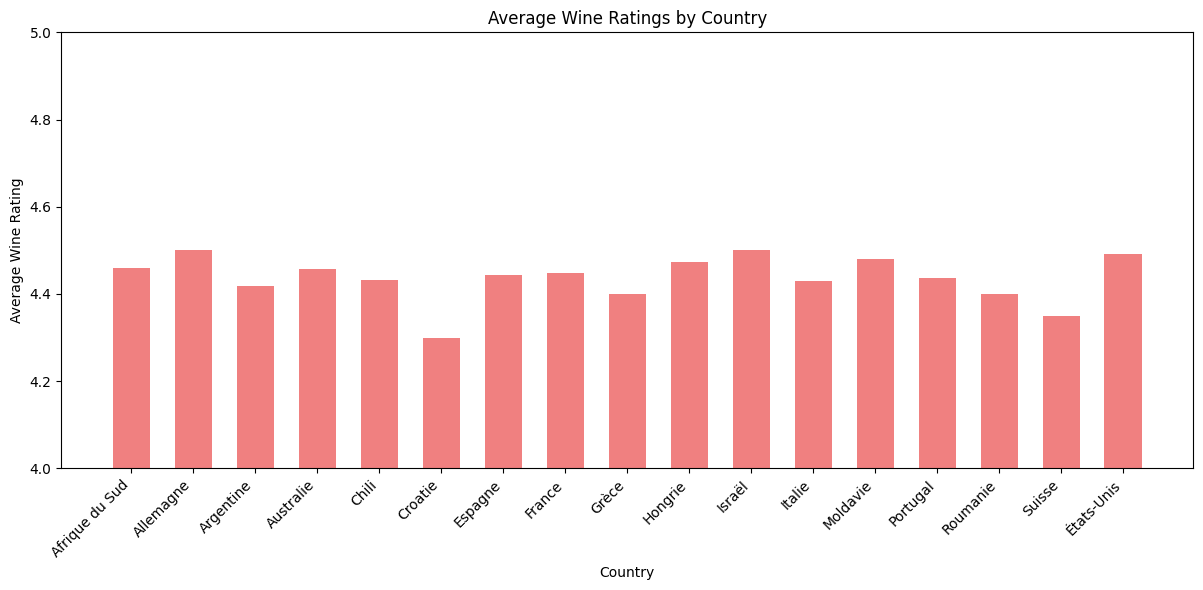

In [29]:


country_query = '''
    SELECT 
        c.name AS country,
        AVG(w.ratings_average) AS avg_rating
    FROM 
        countries c
    JOIN 
        regions r ON c.code = r.country_code
    JOIN 
        wines w ON r.id = w.region_id
    GROUP BY 
        c.name
'''

cur.execute(country_query)
country_results = cur.fetchall()

# Create a table
table = PrettyTable()
table.field_names = ["Country", "Average Rating"]

for country, avg_rating in country_results:
    table.add_row([country, f"{avg_rating:.2f}"])

print(table)

country_names = [row[0] for row in country_results]
avg_ratings_country = [row[1] for row in country_results]



plt.figure(figsize=(12, 6))
plt.bar(country_names, avg_ratings_country, color='lightcoral', width=0.6)
plt.xlabel('Country')
plt.ylabel('Average Wine Rating')
plt.title('Average Wine Ratings by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(4, max(avg_ratings_country) + 0.5)
plt.show()



+----------------+------------------------+
|    Country     | Vintage Average Rating |
+----------------+------------------------+
|    Roumanie    |          4.50          |
|    Croatie     |          4.40          |
|   Argentine    |          4.32          |
|     Chili      |          4.12          |
|    Portugal    |          3.93          |
|    Moldavie    |          3.87          |
|   États-Unis   |          3.70          |
| Afrique du Sud |          3.66          |
|     Italie     |          3.63          |
|    Espagne     |          3.38          |
|    Hongrie     |          3.17          |
|     France     |          3.07          |
|   Australie    |          2.83          |
|     Grèce      |          2.30          |
|     Suisse     |          2.20          |
|   Allemagne    |          1.70          |
|     Israël     |          0.00          |
+----------------+------------------------+


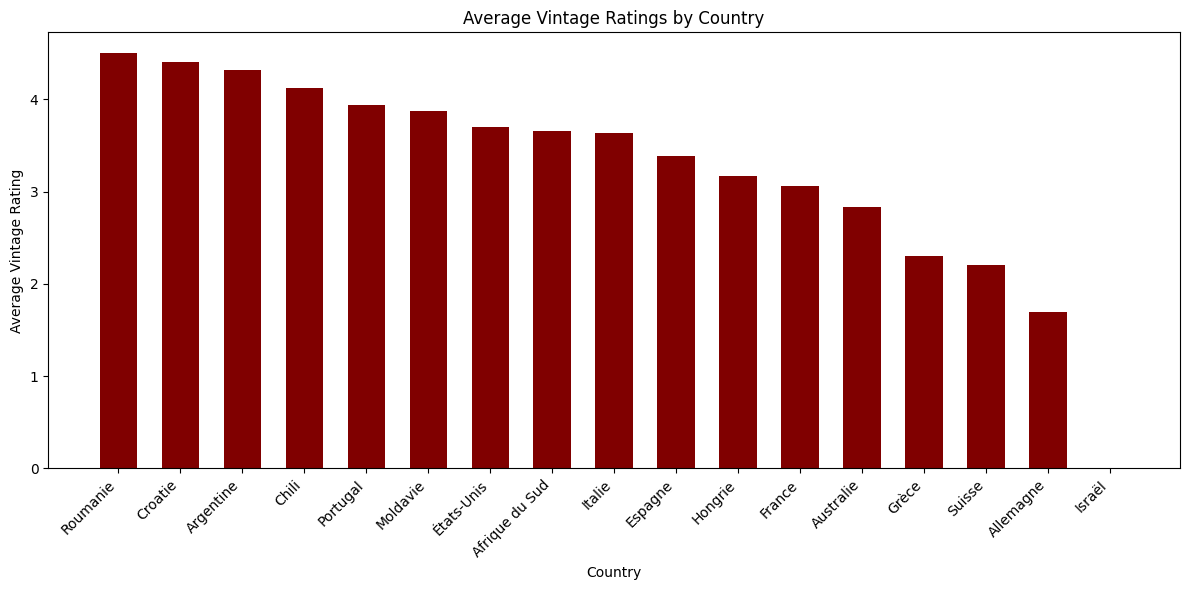

In [45]:
vintage_query = '''
    SELECT 
        c.name AS country,
        AVG(v.ratings_average) AS avg_rating
    FROM 
        countries c
    JOIN 
        regions r ON c.code = r.country_code
    JOIN 
        wines w ON r.id = w.region_id
    JOIN
        vintages v ON w.id = v.wine_id
    GROUP BY 
        c.name
    ORDER BY 
        AVG(v.ratings_average) DESC;
'''


cur.execute(vintage_query)
vintage_results = cur.fetchall()

table = PrettyTable()
table.field_names = ["Country", "Vintage Average Rating"]

for country, avg_rating in vintage_results:  # Use sorted data
    table.add_row([country, f"{avg_rating:.2f}"])

print(table)

# Extracting data for plotting
country_names = [row[0] for row in vintage_results]
avg_ratings_country = [row[1] for row in vintage_results]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(country_names, avg_ratings_country, color='maroon', width=0.6)
plt.xlabel('Country')
plt.ylabel('Average Vintage Rating')
plt.title('Average Vintage Ratings by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()